# Comparing similarities between images 

## Method 1: Euclidean distance and SSIM

In [51]:
from skimage.measure import compare_ssim as ssim
from sklearn.metrics import pairwise_distances
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def mse(x,y): return np.sqrt(((x-y)**2).sum())/(x.shape[0])

def show_images():
    for i, img in enumerate(images):
        plt.subplot(131+i)
        plt.imshow(img/255.0)
        
def calculate_scores(images, ssim=False):
    org = images[0]
    
    for i, img in enumerate(images):
        mse_score = mse(org.flatten(), img.flatten())
        if ssim: 
            ssim_score = ssim(org, img, multichannel=True)
            label = "For image {}; MSE: {:.4f}, SSIM: {:.4f}"
            print(label.format(i, mse_score, ssim_score ))
        else:
            label = "For image {}; MSE: {:.4f}"
            print(label.format(i, mse_score))

In [32]:
image_names = ['cat1.jpg', 'cat2.png', 'cat_d.jpg']
imgs = []
for img in image_names:
    imgs.append(image.img_to_array(image.load_img(img, target_size=(150,150))))
    
images = np.array(imgs)

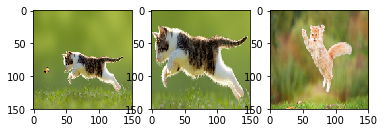

In [33]:
show_images()

In [34]:
calculate_scores(images)

For image 0; MSE: 0.0000, SSIM: 1.0000
For image 1; MSE: 0.1973, SSIM: 0.0055
For image 2; MSE: 0.2075, SSIM: 0.0061


### Results:
Not very satsifactory (as expected). These methods uses vector operations to find distance between two 3D-vector and have not general understanding of the image. Operations like scaling, light, rotation, etc drastically changes the pixel values resulting in high distance between the same looking (to humans) images. 

## Methods 2: CNNs for features extraction

In [35]:
from keras.applications import VGG16

In [39]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [40]:
features = model.predict(images)

In [42]:
features.shape

(3, 4, 4, 512)

In [69]:
## using different distance metrics
def calculate_scores_dist(images, dist='euclidean'):
    distances = pairwise_distances(images.reshape(len(images), -1), metric= dist)[0]
    for i,d in enumerate(distances):
        print('{} for image {:.4f}; {:.4f}'.format(dist, i, d))

In [70]:
calculate_scores_dist(features)

euclidean for image 0.0000; 0.0000
euclidean for image 1.0000; 1968.6661
euclidean for image 2.0000; 1739.9182


In [73]:
for d in ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']:
    calculate_scores_dist(features,dist=d)
    print()

cityblock for image 0.0000; 0.0000
cityblock for image 1.0000; 62297.4134
cityblock for image 2.0000; 52524.4010

cosine for image 0.0000; 0.0000
cosine for image 1.0000; 0.5999
cosine for image 2.0000; 0.7434

euclidean for image 0.0000; 0.0000
euclidean for image 1.0000; 1968.6661
euclidean for image 2.0000; 1739.9182

l1 for image 0.0000; 0.0000
l1 for image 1.0000; 62297.4134
l1 for image 2.0000; 52524.4010

l2 for image 0.0000; 0.0000
l2 for image 1.0000; 1968.6661
l2 for image 2.0000; 1739.9182

manhattan for image 0.0000; 0.0000
manhattan for image 1.0000; 62297.4134
manhattan for image 2.0000; 52524.4010



### Results:
Again, not very satisfactory. Possible problems could be, the features generated by VGG16 are meaningful but our distance fails to capture it. The approach of taking difference of corresepinding elements might not be the right approach. I also tried using different distance metrics. Still the same results. All the distances think that image-3 is more closer to image-1 than image-2, which is not True.

## Going completely DL (CNNs - feature extaction & FC - classification) 
[siamese network](https://www.kaggle.com/kmader/image-similarity-with-siamese-networks/comments)

In [75]:
# to do
# build siamese model, use full vgg16 for feature Extraction.
# build siamese model, use only first 3/4 blocks of layers for Feature extraction.
# making data generator, should take 2 images and return 2images + [0,1], whether similar or not.